# Statistical data types: why it matters

## Notebook set-up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 1. Load AirBnB data

In [2]:
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
data_df.head().transpose()

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


## 2. Neighborhood group vs price

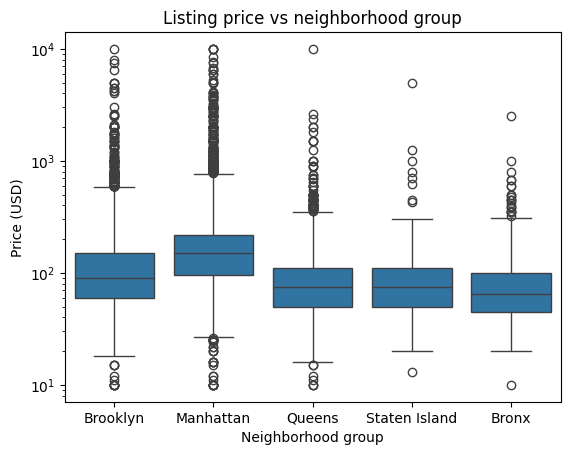

In [3]:
sns.boxplot(data_df, x='neighbourhood_group', y='price', log_scale=True)
plt.title('Listing price vs neighborhood group')
plt.xlabel('Neighborhood group')
plt.ylabel('Price (USD)')
plt.show()

### 2.1. Encode neighborhood group

In [4]:
encoding_one={
    'neighbourhood_group':{
        'Bronx': '0',
        'Queens': '1',
        'Staten Island': '2',
        'Brooklyn': '3',
        'Manhattan': '4'
    }
}

encoding_one_df=data_df.replace(encoding_one).dropna()
encoding_one_df['neighbourhood_group']=encoding_one_df['neighbourhood_group'].astype(int)

encoding_two={
    'neighbourhood_group':{
        'Bronx': '4',
        'Queens': '0',
        'Staten Island': '1',
        'Brooklyn': '3',
        'Manhattan': '2'
    }
}

encoding_two_df=data_df.replace(encoding_two).dropna()
encoding_two_df['neighbourhood_group']=encoding_two_df['neighbourhood_group'].astype(int)

### 2.2. Plot correlation between neighborhood group and price

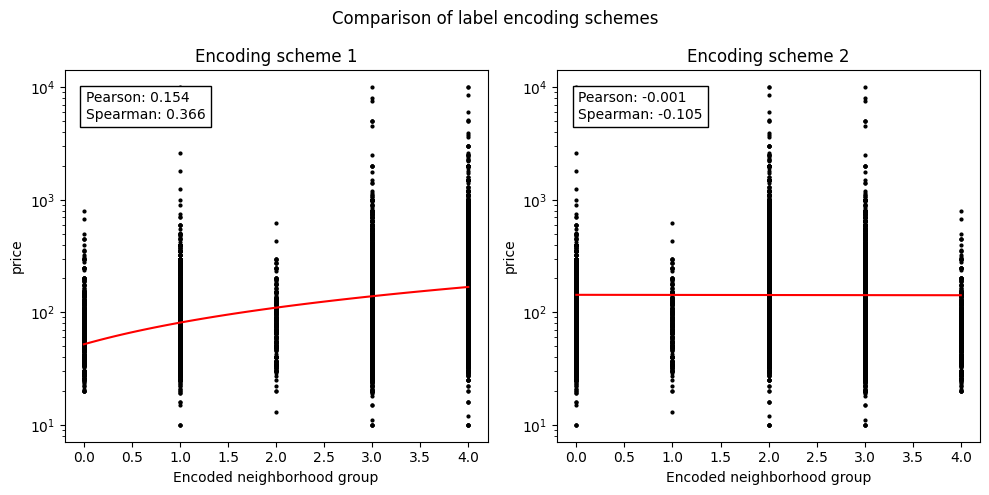

In [5]:
feature='price'

fig, axs=plt.subplots(1,2, figsize=(10,5))
axs=axs.flatten()

fig.suptitle('Comparison of label encoding schemes')

for i, (ax, df) in enumerate(zip(axs, [encoding_one_df, encoding_two_df])):

    ax.set_title(f'Encoding scheme {i+1}')
    ax.scatter(df['neighbourhood_group'], df[feature], s=4, color='black')
    ax.set_xlabel('Encoded neighborhood group')
    ax.set_ylabel(feature)
    ax.set_yscale('log')

    reg=stats.linregress(df['neighbourhood_group'], df[feature])
    reg_x=np.linspace(min(df['neighbourhood_group']),max(df['neighbourhood_group']))
    reg_y=reg.slope*reg_x + reg.intercept
    ax.plot(reg_x, reg_y, color='red')

    pcc=stats.pearsonr(df['neighbourhood_group'], df[feature])
    src=stats.spearmanr(df['neighbourhood_group'], df[feature])
    ax.annotate(
        f'Pearson: {pcc.statistic:.3f}\nSpearman: {src.statistic:.3f}',
        xy=(0.05, 0.87),
        xycoords='axes fraction',
        bbox=dict(facecolor='white')
    )

plt.tight_layout()
plt.show()